In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train (2).csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
# Data Analyasis
# Apply ML

In [7]:
# Data Analysis

# 1. Asking the right question
# 2. Data Preprocessing
# 3. Exploratory Data Analysis(EDA)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
418-91

327

In [12]:
204-176

28

In [13]:
(204/891)*100

22.895622895622896

In [14]:
# Cabin Col train

train['Cabin'].fillna(0,inplace=True)

In [15]:
def transform_cabin(cabin):
    if cabin!=0:
        return 1
    else:
        return 0

In [16]:
train['Cabin']=train['Cabin'].apply(transform_cabin)

In [17]:
train['Cabin'].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

In [18]:
test['Cabin'].fillna(0,inplace=True)
test['Cabin']=test['Cabin'].apply(transform_cabin)

In [19]:
# Train embarked missing values
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
train['Embarked'].fillna('S',inplace=True)

In [21]:

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [22]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [23]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [24]:
176/891

0.19753086419753085

In [25]:
# random in the range of mean-std and mean + std

# Generate 177 random age values

train_random_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean() + train['Age'].std(),size=177)

In [26]:
train['Age'][train['Age'].isnull()]=train_random_age

C:\Users\KOUSTAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
test_random_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean() + test['Age'].std(),size=86)
test['Age'][test['Age'].isnull()]=test_random_age

C:\Users\KOUSTAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [29]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [30]:
train.groupby('Embarked').mean()['Survived']

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [31]:
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)

In [32]:
train[train['Embarked']=='C']['Pclass'].value_counts()

1    85
3    66
2    17
Name: Pclass, dtype: int64

In [33]:
train[train['Embarked']=='Q']['Pclass'].value_counts()

3    72
2     3
1     2
Name: Pclass, dtype: int64

In [34]:
train[train['Embarked']=='S']['Pclass'].value_counts()

3    353
2    164
1    129
Name: Pclass, dtype: int64

In [35]:
train['family']=train['SibSp'] + train['Parch'] + 1

In [36]:
test['family']=train['SibSp'] + train['Parch'] + 1

In [37]:
train.groupby('family').mean()['Survived']

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [38]:
def family_type(number):
    if number==1:
        return "Alone"
    elif number>1 and number<=4:
        return "Small"
    else:
        return "Large"

In [39]:
train['family_type']=train['family'].apply(family_type)

In [40]:
test['family_type']=test['family'].apply(family_type)

In [41]:
train.groupby('family_type').mean()['Survived']

family_type
Alone    0.303538
Large    0.161290
Small    0.578767
Name: Survived, dtype: float64

In [42]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [43]:
print(train.shape)
print(test.shape)

(891, 10)
(418, 9)


In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,family_type
0,1,0,3,male,22.0,A/5 21171,7.2500,0,S,Small
1,2,1,1,female,38.0,PC 17599,71.2833,1,C,Small
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,0,S,Alone
3,4,1,1,female,35.0,113803,53.1000,1,S,Small
4,5,0,3,male,35.0,373450,8.0500,0,S,Alone


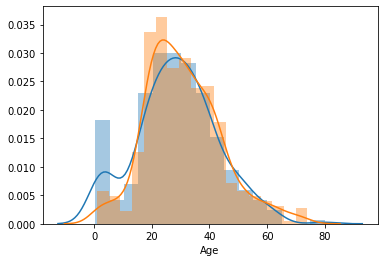

In [45]:
sns.distplot(train[train['Survived']==1]['Age'])
sns.distplot(train[train['Survived']==0]['Age'])

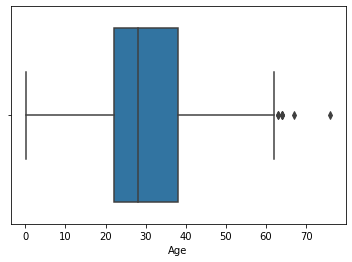

In [46]:
# Come back here again
sns.boxplot(test['Age'])

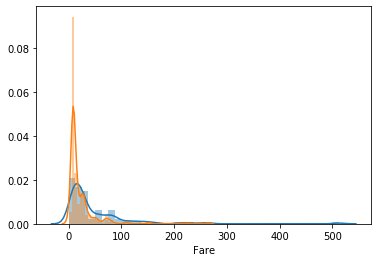

In [47]:
sns.distplot(train[train['Survived']==1]['Fare'])
sns.distplot(train[train['Survived']==0]['Fare'])

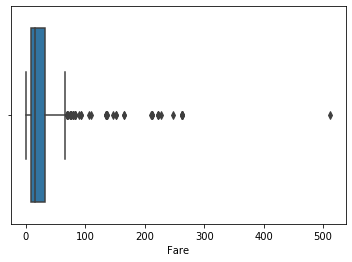

In [48]:
sns.boxplot(test['Fare'])

In [49]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family_type
0,1,0,3,male,22.0,7.2500,0,S,Small
1,2,1,1,female,38.0,71.2833,1,C,Small
2,3,1,3,female,26.0,7.9250,0,S,Alone
3,4,1,1,female,35.0,53.1000,1,S,Small
4,5,0,3,male,35.0,8.0500,0,S,Alone


In [51]:
passengerId=test['PassengerId'].values

In [52]:
train.drop(columns=['PassengerId'],inplace=True)


In [53]:
test.drop(columns=['PassengerId'],inplace=True)

In [54]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Cabin','Embarked','family_type'],drop_first=True)

In [55]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Cabin','Embarked','family_type'],drop_first=True)

In [56]:
train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Cabin_1,Embarked_Q,Embarked_S,family_type_Large,family_type_Small
0,0,22.0,7.2500,0,1,1,0,0,1,0,1
1,1,38.0,71.2833,0,0,0,1,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,1,0,1,0,1
4,0,35.0,8.0500,0,1,1,0,0,1,0,0


In [57]:
train.corr()['Survived']

Survived             1.000000
Age                 -0.076607
Fare                 0.257307
Pclass_2             0.093349
Pclass_3            -0.322308
Sex_male            -0.543351
Cabin_1              0.316912
Embarked_Q           0.003650
Embarked_S          -0.149683
family_type_Large   -0.125147
family_type_Small    0.279855
Name: Survived, dtype: float64

In [58]:
X=train.iloc[:,1:].values

In [59]:
y=train.iloc[:,0].values

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [61]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [62]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [63]:
y_pred=clf.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7821229050279329

In [65]:
for i in range(1,25):
    clf=DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

0.776536312849162
0.7206703910614525
0.8044692737430168
0.776536312849162
0.770949720670391
0.770949720670391
0.7541899441340782
0.776536312849162
0.7597765363128491
0.776536312849162
0.776536312849162
0.776536312849162
0.770949720670391
0.770949720670391
0.7821229050279329
0.776536312849162
0.770949720670391
0.7877094972067039
0.7821229050279329
0.776536312849162
0.770949720670391
0.7821229050279329
0.776536312849162
0.7653631284916201


In [66]:
X_final=test.iloc[:,:].values

In [67]:
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
y_final=clf.predict(X_final)

In [68]:
new=pd.DataFrame()

In [69]:
new['passengerId']=passengerId
new['Survived']=y_final

In [70]:
new.to_csv('submission.csv',index=False)